In [ ]:
from math import factorial
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def getTangentVector (a, b):
    return (b - a) / np.linalg.norm(b - a)

In [ ]:
def getTs (P_tran, P_start):
    return (P_tran - P_start) / np.linalg.norm(P_tran - P_start)

In [ ]:
def getTe (P_tran, P_end):
    return (P_end - P_tran) / np.linalg.norm(P_end - P_tran)

def bezier_5(u, p0, p1, p2, p3, p4, p5):
    t = 1 - u
    return (t**5)*p0 + 5*u*(t**4)*p1 + 10*(u*u)*(t**3)*p2 + 10*(u**3)*(t*t)*p3 + 5*(u**4)*t*p4 + (u**5)*p5


In [ ]:
def get_theta(P_start, P_trans, P_end):
    len_start_trans = np.linalg.norm(P_start - P_trans)
    len_trans_end = np.linalg.norm( P_trans - P_end)
    len_start_end = np.linalg.norm(P_start - P_end)
    print('a {} b {} c {}'.format(len_start_trans, len_trans_end, len_start_end))
    theta = np.arccos( ((len_start_trans**2 + len_trans_end**2 - len_start_end**2) / (2 * len_start_trans * len_trans_end)) )
    return theta


In [ ]:
def get_bezier_params(init_cornering_err, nu, theta, seg_len):
    cornering_fit_step = 0.001
    cornering_err = init_cornering_err
    Lt = seg_len
    d = 0
    c = 0
    
    i = 0
    while(Lt > seg_len/2.):
        d = (32 * cornering_err) / ((7*nu + 16) * np.sqrt(2+2*np.cos(theta)))
        c = (nu * 32 * cornering_err) / ((7*nu + 16) * np.sqrt(2+2*np.cos(theta)))
        Lt = 2*c + d
        if (Lt <= seg_len/2.):
            break
        i = i+1
        cornering_err = cornering_err - cornering_fit_step
    print('Result iteration={} e={}; segment length={}; Lt={};'.format(i, cornering_err, seg_len, Lt))
    return (cornering_err, d, c, Lt)


In [ ]:
def get_bezier_params2(cornering_err, nu, theta, seg_len):                                                    
                                                                                                              
    Lt0 = (2*nu + 1) * (32 * cornering_error) / ((7*nu + 16) * np.sqrt(2+2*np.cos(theta)))                    
    if (seg_len / 2 > Lt0):                                                                                   
        Lt = Lt0                                                                                              
    else:                                                                                                     
        Lt = seg_len / 2                                                                                      
        cornering_err = Lt * ((7*nu + 16) * np.sqrt(2+2*np.cos(theta))) / (32 * (2*nu + 1))                   
                                                                                                              
    d = (Lt / (2 * nu + 1))                                                                                   
    c = d * nu                                                                                                
                                                                                                              
    print('Result e={}; segment length={}; Lt={};'.format(cornering_err, seg_len, Lt))                        
    return (cornering_err, d, c, Lt) 


# Generate points

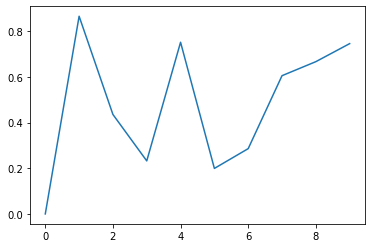

In [ ]:

N = 10
points = np.array([[0.,0.]], dtype=float)
for i in np.arange(1.0, N, 1.0):
    points = np.append(points, np.array( [[i, np.random.random_sample()]]), axis=0)

plt.plot(points[:, 0], points[:, 1], label='trajectory')

In [147]:
ts = np.array([ getTangentVector(points[i], points[i+1]) for i in np.arange(0, points.shape[0]-2) ], dtype=float)
te = np.array([ getTangentVector(points[i], points[i+1]) for i in np.arange(1, points.shape[0]-1) ], dtype=float)

In [148]:


# calculate tangent vectors along linear segment
#ts = np.empty((0,2), dtype=float)
#te = np.empty((0,2), dtype=float)
#for i in np.arange(0, points.shape[0]-2):
#    ts = np.append(ts, np.array( [getTangentVector(points[i], points[i+1])] ), axis=0)

#for i in np.arange(1, points.shape[0]-1):
#    te = np.append(te, np.array( [getTangentVector(points[i], points[i+1])] ), axis=0)



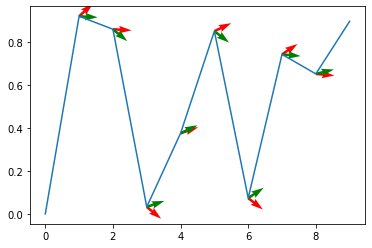

In [149]:
plt.plot(points[:, 0], points[:, 1], label='trajectory')
plt.quiver(points[1:-1,0], points[1:-1, 1], ts[:, 0], ts[:, 1], color=['r'])
plt.quiver(points[1:-1,0], points[1:-1, 1], te[:, 0], te[:, 1], color=['g'])
plt.show()

In [ ]:
thetas = np.empty((0), dtype=float)
nu = np.empty((0), dtype=float)
seg_len = np.empty((0), dtype=float)

for i in np.arange(0, points.shape[0]-2):
    (p_start, p_trans, p_end) = points[i:i+3];
    print('start [{}]; trans [{}]; end [{}]'.format( p_start, p_trans, p_end ))
    ds = np.linalg.norm(p_start - p_trans)
    de = np.linalg.norm(p_trans - p_end)
    theta = get_theta(p_start, p_trans, p_end)
    seg_len = np.append(seg_len, np.array( [min(ds, de)] ), axis=0)
    print('ds {}; de {}; theta {}'.format(ds, de, theta))
    thetas = np.append(thetas, np.array( [theta] ), axis=0)
    nu = np.append(nu, np.array( [1/2.0769 * get_theta(p_start, p_trans, p_end) ** 0.9927 ] ), axis=0)
    
    
print('Thetas: {}'.format(thetas) )
print('Nu: {}'.format(nu))
print('Segments length: {}'.format(seg_len) )


start [[0. 0.]]; trans [[1.         0.48727546]]; end [[2.         0.64375942]]
a 1.1124016225839293 b 1.0121695657828458 c 2.10105358956488
ds 1.1124016225839293; de 1.0121695657828458; theta 2.843401518876363
a 1.1124016225839293 b 1.0121695657828458 c 2.10105358956488
start [[1.         0.48727546]]; trans [[2.         0.64375942]]; end [[3.        0.4697435]]
a 1.0121695657828458 b 1.0150278521093596 c 2.0000768409283882
ds 1.0121695657828458; de 1.0150278521093596; theta 2.814076865623156
a 1.0121695657828458 b 1.0150278521093596 c 2.0000768409283882
start [[2.         0.64375942]]; trans [[3.        0.4697435]]; end [[4.         0.50293998]]
a 1.0150278521093596 b 1.0005508515989934 c 2.004951399238744
ds 1.0150278521093596; de 1.0005508515989934; theta 2.9361176850098576
a 1.0150278521093596 b 1.0005508515989934 c 2.004951399238744
start [[3.        0.4697435]]; trans [[4.         0.50293998]]; end [[5.        0.9426957]]
a 1.0005508515989934 b 1.0924216641246962 c 2.05516028265

In [ ]:
cornering_error = 0.2
es = np.empty((0), dtype=float)
ds = np.empty((0), dtype=float)
cs = np.empty((0), dtype=float)
Lts = np.empty((0), dtype=float)
for i in np.arange(0, seg_len.shape[0]):
    (e, d, c, Lt) = get_bezier_params2(cornering_error, nu[i], thetas[i], seg_len[i])
    es = np.append(es, np.array([e]), axis=0)
    ds = np.append(ds, np.array([d]), axis=0)
    cs = np.append(cs, np.array([c]), axis=0)
    Lts = np.append(Lts, np.array([Lt]), axis=0)

print('E: {}'.format(es))    
#ds = (32 * cornering_error) / ((7*nu + 16) * np.sqrt(2+2*np.cos(thetas)))
print('D: {}'.format(ds))
#cs = (nu * 32 * cornering_error) / ((7*nu + 16) * np.sqrt(2+2*np.cos(thetas)))
print('C: {}'.format(cs))
#Lts = 2*cs + ds
print('L: {}'.format(Lts))


Result e=0.03224402928063833; segment length=1.0121695657828458; Lt=0.5060847828914229;
Result e=0.03551860677494223; segment length=1.0121695657828458; Lt=0.5060847828914229;
Result e=0.021756999724077658; segment length=1.0005508515989934; Lt=0.5002754257994967;
Result e=0.04107293171056043; segment length=1.0005508515989934; Lt=0.5002754257994967;
Result e=0.10502066625423769; segment length=1.0924216641246962; Lt=0.5462108320623481;
Result e=0.009751149534825183; segment length=1.065771533717221; Lt=0.5328857668586106;
Result e=0.11770201049209003; segment length=1.065771533717221; Lt=0.5328857668586106;
Result e=0.0807116521809373; segment length=1.0053194001882269; Lt=0.5026597000941134;
E: [0.03224403 0.03551861 0.021757   0.04107293 0.10502067 0.00975115
 0.11770201 0.08071165]
D: [0.13614265 0.13716924 0.13146945 0.13748993 0.17129687 0.13604091
 0.17318344 0.15164252]
C: [0.18497106 0.18445777 0.18440299 0.18139275 0.18745698 0.19842243
 0.17985116 0.17550859]
L: [0.50608478 

In [ ]:
P0 = np.empty((0,2), dtype=float)
P2 = np.empty((0,2), dtype=float)
P1 = np.empty((0,2), dtype=float)
P3 = np.empty((0,2), dtype=float)
P4 = np.empty((0,2), dtype=float)
P5 = np.empty((0,2), dtype=float)
for i in np.arange(0, Lts.shape[0]):
    p0 = points[i+1] - Lts[i] * ts[i]
    p5 = points[i+1] + Lts[i] * te[i]
    
    P0 = np.append(P0, [p0], axis=0 )
    P1 = np.append(P1, [p0 + cs[i]*ts[i]], axis=0)
    P2 = np.append(P2, [p0 + 2*cs[i]*ts[i]], axis=0)
    P3 = np.append(P3, [p5 - 2*cs[i]*te[i]], axis=0 )
    P4 = np.append(P4, [p5 - cs[i]*te[i]], axis=0)
    P5 = np.append(P5, [p5], axis=0 )
    
print('P0 {}'.format(P0))
print('P1 {}'.format(P1))
print('P2 {}'.format(P2))
print('P3 {}'.format(P3))
print('P4 {}'.format(P4))
print('P5 {}'.format(P5))  

P0 [[0.5450521  0.26559051]
 [1.5        0.56551744]
 [2.50713133 0.55551049]
 [3.5        0.48634174]
 [4.5        0.72281784]
 [5.51802797 0.69837995]
 [6.5        0.28676711]
 [7.59070709 0.52359909]]
P1 [[0.71133293 0.34661508]
 [1.68223999 0.59403507]
 [2.68880417 0.52389652]
 [3.68129288 0.49236003]
 [4.67159764 0.79827888]
 [5.69749244 0.61373974]
 [6.66875208 0.22456441]
 [7.73361575 0.62548325]]
P2 [[0.87761376 0.42763964]
 [1.86447998 0.62255271]
 [2.87047701 0.49228256]
 [3.86258576 0.49837831]
 [4.84319528 0.87373993]
 [5.8769569  0.52909954]
 [6.83750416 0.1623617 ]
 [7.8765244  0.72736741]]
P3 [[1.13450578 0.50832345]
 [2.1351384  0.62024318]
 [3.13139707 0.47410542]
 [4.12585793 0.55828673]
 [5.15493058 0.86962632]
 [6.12764547 0.4240185 ]
 [7.14101539 0.20299947]
 [8.15084015 0.79981811]]
P4 [[1.31725289 0.53692044]
 [2.31686521 0.58861983]
 [3.31569853 0.48022358]
 [4.29190439 0.63130661]
 [5.32447728 0.7896636 ]
 [6.31382274 0.35539281]
 [7.28746    0.30740452]
 [8.32

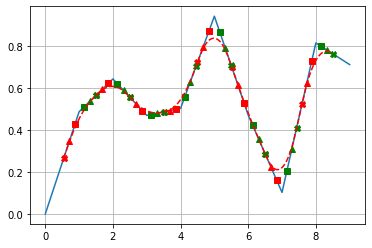

In [ ]:
B = np.empty((0,2), dtype=float)
for i in np.arange(0, P0.shape[0]):
    for u in np.arange(0, 1, 0.001):
        B = np.append(B, [bezier_5(u, P0[i], P1[i], P2[i], P3[i], P4[i], P5[i])], axis=0)

plt.plot(points[:, 0], points[:, 1], label='trajectory')
plt.plot(P0[:, 0], P0[:, 1], "rX", P1[:,0], P1[:, 1], "r^", P2[:, 0], P2[:, 1], "rs", P3[:, 0], P3[:, 1], "gs", P4[:, 0], P4[:, 1], "g^", P5[:, 0], P5[:, 1], "gX")
#plt.plot(P0[:, 0], P0[:, 1], "rX", P5[:, 0], P5[:, 1], "gX")
plt.plot(B[:, 0], B[:, 1], 'r--')

plt.grid()
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)

plt.show()
